In [3]:
# Prepare packages

library(ggplot2)
library(ggpubr)
library(tidyr)
library(car)
library(psych)
library(aod)
library(smbinning)
library(nnet)
library(lmSupport)
library(lme4)
library(simr)
library(dplyr)
library(lmerTest)
library(ggplot2)
library(sjPlot)
library(interactions)
library(emmeans)
library(car)
library(patchwork)
library(psych)
library(corrplot)
library(forcats)
library(performance)
library(ggeffects)
library(patchwork)
library(tidyverse)
library(textdata)
library(tidytext)


Loading required package: carData


Attaching package: ‘psych’


The following object is masked from ‘package:car’:

    logit


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha


Loading required package: sqldf

Loading required package: gsubfn

Loading required package: proto

Loading required package: RSQLite

Loading required package: partykit

Loading required package: grid

Loading required package: libcoin

Loading required package: mvtnorm

Loading required package: Formula

Registered S3 methods overwritten by 'lme4':
  method                          from
  cooks.distance.influence.merMod car 
  influence.merMod                car 
  dfbeta.influence.merMod         car 
  dfbetas.influence.merMod        car 

Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack



Attaching package: ‘simr’


The following object is masked from ‘package:lme4’:

    getData


The

In [4]:
file_path <- "data/metaphorValence.csv"
file_path_priming <- "data/primingValence.csv"

In [5]:
d <- read.csv(file_path)
d_priming <- read.csv(file_path_priming)

In [6]:
# Organize data

# Make sure variable type is factor
d$condition <- factor(d$condition)
d$gender <- as.factor(d$gender) 
d$politics <- as.factor(d$politicalView) 
d$valence <- as.factor(d$valence)
d$covertness <- as.factor(d$covertness)
d$covertness <- as.factor(d$politics)

d_priming$condition <- factor(d_priming$condition)
d_priming$gender <- as.factor(d_priming$gender) 
d_priming$politics <- as.factor(d_priming$politicalView) 
d_priming$valence <- as.factor(d_priming$valence)
d_priming$covertness <- as.factor(d_priming$covertness)
d_priming$covertness <- as.factor(d_priming$politics)

# Set reference levels

d$condition <- relevel(d$condition, ref = "increase")
d$politics <- relevel(d$politics, ref = "Republican")
d$gender <- relevel(d$gender, ref = "Male")

d_priming$condition <- relevel(d_priming$condition, ref = "increase")
d_priming$politics <- relevel(d_priming$politics, ref = "Republican")
d_priming$gender <- relevel(d_priming$gender, ref = "Male")

In [7]:
table(d$gender)
table(d$politics)
table(d$immigration)
table(d$valence)


  Male Female  Other 
   501    423      1 


 Republican    Democrat Independent       Other 
        223         462         234           6 


BornInUS    Other 
     879       46 


   mixed negative  neutral positive 
      25      167       29      685 

In [8]:
table(d_priming$gender)
table(d_priming$politics)
table(d_priming$immigration)
table(d_priming$valence)


  Male Female  Other 
   238    232      2 


 Republican    Democrat Independent 
         94         251         127 


BornInUS    Other 
     451       21 


negative positive 
      73      399 

In [9]:
# Clean data

# Drop unnecessary columns
d <- d[, !(names(d) %in% c(
  "Status", "RecordedDate", "RecipientLastName", "RecipientFirstName",
  "RecipientEmail", "ExternalReference", "DistributionChannel",
  "UserLanguage", "consent", "Finished", "language.1_3_1", "language.1_3_3", "language.1_3_2",
  "language.1_4_1", "language.1_4_2", "language.1_4_3", "language.1_5_1",
  "language.1_5_2", "language.1_5_3", "random", "immigrationStatus_5_TEXT", "immigrationStatus_5",
  "immigrationStatus_3", "immigrationStatus_4", "immigrationStatus_6", "immigrationStatus_8",
  "immigrationStatus_2", "language.1_2_1", "language.1_2_2", "language.1_2_3", "language.1_1_3",
  "language.1_1_3", "politicalView_4_TEXT", "previousParticipatio", "gender_3_TEXT", "Progress",
  "StartDate", "EndDate", "IPAddress", "Duration..in.seconds.", "immigrationStatus_1"
))]

d_priming <- d_priming[, !(names(d_priming) %in% c(
  "Status", "RecordedDate", "RecipientLastName", "RecipientFirstName",
  "RecipientEmail", "ExternalReference", "DistributionChannel",
  "UserLanguage", "consent", "Finished", "language.1_3_1", "language.1_3_3", "language.1_3_2",
  "language.1_4_1", "language.1_4_2", "language.1_4_3", "language.1_5_1",
  "language.1_5_2", "language.1_5_3", "random", "immigrationStatus_5_TEXT", "immigrationStatus_5",
  "immigrationStatus_3", "immigrationStatus_4", "immigrationStatus_6", "immigrationStatus_8",
  "immigrationStatus_2", "language.1_2_1", "language.1_2_2", "language.1_2_3", "language.1_1_3",
  "language.1_1_3", "politicalView_4_TEXT", "previousParticipatio", "gender_3_TEXT", "Progress",
  "StartDate", "EndDate", "IPAddress", "Duration..in.seconds.", "immigrationStatus_1"
))]

# Drop rows where valence of their response is NA
d <- d[!is.na(d$valence), ]
d <- d[d$valence != "NA", ]
d_priming <- d_priming[!is.na(d_priming$valence), ]
d_priming <- d_priming[d_priming$valence != "NA", ]

# Drop rows where politicalView is Other
d <- d[d$politicalView != "Other", ]

# Drop rows where gender is Other
d <- d[d$gender != "Other", ]
d_priming <- d_priming[d$gender != "Other", ]


# Drop rows where valence is mixed or neutral
d <- d[!(d$valence %in% c("mixed", "neutral")), ]

In [10]:
d <- droplevels(d)
d_priming <- droplevels(d_priming)

In [11]:
dim(d)
dim(d_priming)

[1] 847  19

[1] 900  19

In [12]:
colnames(d)

colnames(d_priming)

[1] "ResponseId"        "LocationLatitude"  "LocationLongitude"
 [4] "condition"         "openQ"             "valence"          
 [7] "metaphor"          "likert"            "covertness"       
[10] "attention"         "association"       "paraphrase"       
[13] "politicalView"     "gender"            "immigration"      
[16] "language.1_1_1"    "language.1_1_2"    "Q36"              
[19] "politics"

[1] "ResponseId"        "LocationLatitude"  "LocationLongitude"
 [4] "condition"         "openQ"             "valence"          
 [7] "metaphor"          "likert"            "covertness"       
[10] "attention"         "association"       "paraphrase"       
[13] "politicalView"     "gender"            "immigration"      
[16] "language.1_1_1"    "language.1_1_2"    "Q36"              
[19] "politics"

In [13]:
# First, add the identifier column to each dataframe
d <- d %>% mutate(experiment = "metaphor_exp")
d_priming <- d_priming %>% mutate(experiment = "priming_exp")

# Then, bind them together
d_combined <- bind_rows(d, d_priming)


In [14]:
model <- glm(valence ~ condition * politics,
             data = d, family = binomial)

summary(model)


Call:
glm(formula = valence ~ condition * politics, family = binomial, 
    data = d)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.6557   0.2444   0.5377   0.7166   1.1774  

Coefficients:
                                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)                             1.0498     0.3105   3.381 0.000723 ***
conditionboost                          0.1788     0.4518   0.396 0.692239    
conditionflood                         -0.1848     0.4304  -0.429 0.667614    
conditioninvasion                      -1.0498     0.4282  -2.452 0.014226 *  
politicsDemocrat                        2.4467     0.6632   3.689 0.000225 ***
politicsIndependent                     0.1919     0.4422   0.434 0.664354    
conditionboost:politicsDemocrat        -0.9673     0.8366  -1.156 0.247610    
conditionflood:politicsDemocrat        -1.4509     0.7818  -1.856 0.063471 .  
conditioninvasion:politicsDemocrat     -1.1278     0.7628  -1.478 0.13928

In [15]:
model_priming <- glm(valence ~ condition * politics,
                     data = d_priming, family = binomial)

summary(model_priming)


Call:
glm(formula = valence ~ condition * politics, family = binomial, 
    data = d_priming)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3200   0.3747   0.4854   0.6203   1.1483  

Coefficients:
                                      Estimate Std. Error z value Pr(>|z|)  
(Intercept)                            1.04145    0.47486   2.193   0.0283 *
conditionboost                         0.21131    0.73954   0.286   0.7751  
conditionflood                         0.29355    0.69146   0.425   0.6712  
conditioninvasion                     -0.97246    0.60298  -1.613   0.1068  
politicsDemocrat                       1.57958    0.70262   2.248   0.0246 *
politicsIndependent                    1.03799    0.71186   1.458   0.1448  
conditionboost:politicsDemocrat       -0.36425    1.01590  -0.359   0.7199  
conditionflood:politicsDemocrat       -1.08646    0.93556  -1.161   0.2455  
conditioninvasion:politicsDemocrat     0.43086    0.89021   0.484   0.6284  
condit

In [17]:
model_priming <- glm(likert ~ condition * politics,
                     data = d_priming)

summary(model_priming)


Call:
glm(formula = likert ~ condition * politics, data = d_priming)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-7.4746  -1.0435   0.5254   1.6250   4.3448  

Coefficients:
                                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)                            6.52174    0.46204  14.115  < 2e-16 ***
conditionboost                         0.25604    0.69732   0.367 0.713657    
conditionflood                         0.26993    0.64658   0.417 0.676528    
conditioninvasion                     -0.86657    0.61870  -1.401 0.161999    
politicsDemocrat                       1.95284    0.54470   3.585 0.000373 ***
politicsIndependent                    1.31159    0.59149   2.217 0.027082 *  
conditionboost:politicsDemocrat       -0.44936    0.80386  -0.559 0.576428    
conditionflood:politicsDemocrat       -0.97527    0.75949  -1.284 0.199745    
conditioninvasion:politicsDemocrat     0.47136    0.73752   0.639 0.523073    
conditionbo

In [18]:
model_valence <- glm(valence ~ condition * experiment,
                     data = d_combined,
                     family = binomial)

model_likert <- lm(likert ~ condition * experiment,
                   data = d_combined)


In [19]:
summary(model_valence)


Call:
glm(formula = valence ~ condition * experiment, family = binomial, 
    data = d_combined)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0648   0.5026   0.5496   0.6905   0.8446  

Coefficients:
                                        Estimate Std. Error z value Pr(>|z|)
(Intercept)                              1.81374    0.19690   9.212  < 2e-16
conditionboost                           0.02845    0.28056   0.101   0.9192
conditionflood                          -0.50841    0.25887  -1.964   0.0495
conditioninvasion                       -0.96644    0.24788  -3.899 9.67e-05
experimentpriming_exp                    0.19160    0.34614   0.554   0.5799
conditionboost:experimentpriming_exp    -0.18796    0.48678  -0.386   0.6994
conditionflood:experimentpriming_exp     0.29484    0.47008   0.627   0.5305
conditioninvasion:experimentpriming_exp  0.27329    0.43338   0.631   0.5283
                                           
(Intercept)                         

In [53]:
model <- lm(likert ~ condition * politics, data = d)
summary(model)


Call:
lm(formula = likert ~ condition * politics, data = d)

Residuals:
   Min     1Q Median     3Q    Max 
-7.510 -1.036  0.500  1.661  4.500 

Coefficients:
                                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)                            6.90741    0.31420  21.984  < 2e-16 ***
conditionboost                         0.01712    0.44644   0.038  0.96942    
conditionflood                        -0.05556    0.44435  -0.125  0.90053    
conditioninvasion                     -1.40741    0.46326  -3.038  0.00246 ** 
politicsDemocrat                       1.60240    0.38857   4.124  4.1e-05 ***
politicsIndependent                    0.24777    0.43662   0.567  0.57055    
conditionboost:politicsDemocrat       -0.18764    0.54696  -0.343  0.73164    
conditionflood:politicsDemocrat       -0.48309    0.54861  -0.881  0.37880    
conditioninvasion:politicsDemocrat     0.73247    0.56195   1.303  0.19278    
conditionboost:politicsIndependent     0.46600    

In [21]:
model_priming_likert <- lm(likert ~ condition * politics, data = d_priming)
summary(model_priming_likert)


Call:
lm(formula = likert ~ condition * politics, data = d_priming)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.4746 -1.0435  0.5254  1.6250  4.3448 

Coefficients:
                                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)                            6.52174    0.46204  14.115  < 2e-16 ***
conditionboost                         0.25604    0.69732   0.367 0.713657    
conditionflood                         0.26993    0.64658   0.417 0.676528    
conditioninvasion                     -0.86657    0.61870  -1.401 0.161999    
politicsDemocrat                       1.95284    0.54470   3.585 0.000373 ***
politicsIndependent                    1.31159    0.59149   2.217 0.027082 *  
conditionboost:politicsDemocrat       -0.44936    0.80386  -0.559 0.576428    
conditionflood:politicsDemocrat       -0.97527    0.75949  -1.284 0.199745    
conditioninvasion:politicsDemocrat     0.47136    0.73752   0.639 0.523073    
conditionboost:politicsIndepende

In [12]:
library(emmeans)

# Estimated marginal means for each condition × politics combo
em <- emmeans(model, ~ condition * politics, type = "response")  # type = "response" gives probabilities

# View means and confidence intervals
summary(em)

# Pairwise comparisons within each condition
pairs(em, by = "condition")


,condition,politics,prob,SE,df,asymp.LCL,asymp.UCL
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,increase,Republican,0.7407407,0.05963579,Inf,0.6085426,0.8400303
2,boost,Republican,0.7735849,0.05748821,Inf,0.6423011,0.8666855
3,flood,Republican,0.7037037,0.06213843,Inf,0.5697645,0.8098605
4,invasion,Republican,0.5000000,0.07372062,Inf,0.3594023,0.6405977
5,increase,Democrat,0.9705882,0.01672970,Inf,0.9127654,0.9904832
6,boost,Democrat,0.9375000,0.02287303,Inf,0.8746754,0.9699142
7,flood,Democrat,0.8653846,0.03346849,Inf,0.7854407,0.9186277
8,invasion,Democrat,0.7889908,0.03908161,Inf,0.7024012,0.8555669
9,increase,Independent,0.7758621,0.05475622,Inf,0.6512586,0.8651629


condition = increase:
 contrast                 odds.ratio     SE  df z.ratio p.value
 Republican / Democrat        0.0866 0.0574 Inf -3.689  0.0007 
 Republican / Independent     0.8254 0.3650 Inf -0.434  0.9014 
 Democrat / Independent       9.5333 6.3423 Inf  3.389  0.0020 

condition = boost:
 contrast                 odds.ratio     SE  df z.ratio p.value
 Republican / Democrat        0.2278 0.1162 Inf -2.901  0.0104 
 Republican / Independent     0.9234 0.4474 Inf -0.164  0.9852 
 Democrat / Independent       4.0541 2.1430 Inf  2.648  0.0221 

condition = flood:
 contrast                 odds.ratio     SE  df z.ratio p.value
 Republican / Democrat        0.3694 0.1529 Inf -2.405  0.0427 
 Republican / Independent     0.9375 0.3997 Inf -0.151  0.9874 
 Democrat / Independent       2.5376 1.0631 Inf  2.223  0.0674 

condition = invasion:
 contrast                 odds.ratio     SE  df z.ratio p.value
 Republican / Democrat        0.2674 0.1008 Inf -3.499  0.0014 
 Republican / Indep

In [14]:
valence_summary <- d %>%
  group_by(condition, politics) %>%
  summarise(
    n = sum(!is.na(valence)),
    n_positive = sum(valence == "positive", na.rm = TRUE),
    proportion_positive = n_positive / n,
    .groups = "drop"
  )

valence_summary <- valence_summary %>%
  mutate(
    se = sqrt(proportion_positive * (1 - proportion_positive) / n),
    ci_low = proportion_positive - 1.96 * se,
    ci_high = proportion_positive + 1.96 * se
  )

valence_summary

condition,politics,n,n_positive,proportion_positive,se,ci_low,ci_high
<fct>,<fct>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
increase,Republican,54,40,0.7407407,0.05963530,0.6238556,0.8576259
increase,Democrat,102,99,0.9705882,0.01672931,0.9377988,1.0033777
increase,Independent,58,45,0.7758621,0.05475653,0.6685393,0.8831849
boost,Republican,53,41,0.7735849,0.05748688,0.6609106,0.8862592
boost,Democrat,112,105,0.9375000,0.02287266,0.8926696,0.9823304
boost,Independent,47,37,0.7872340,0.05969722,0.6702275,0.9042406
flood,Republican,54,38,0.7037037,0.06213856,0.5819121,0.8254953
flood,Democrat,104,90,0.8653846,0.03346842,0.7997865,0.9309827
flood,Independent,53,38,0.7169811,0.06187620,0.5957038,0.8382585


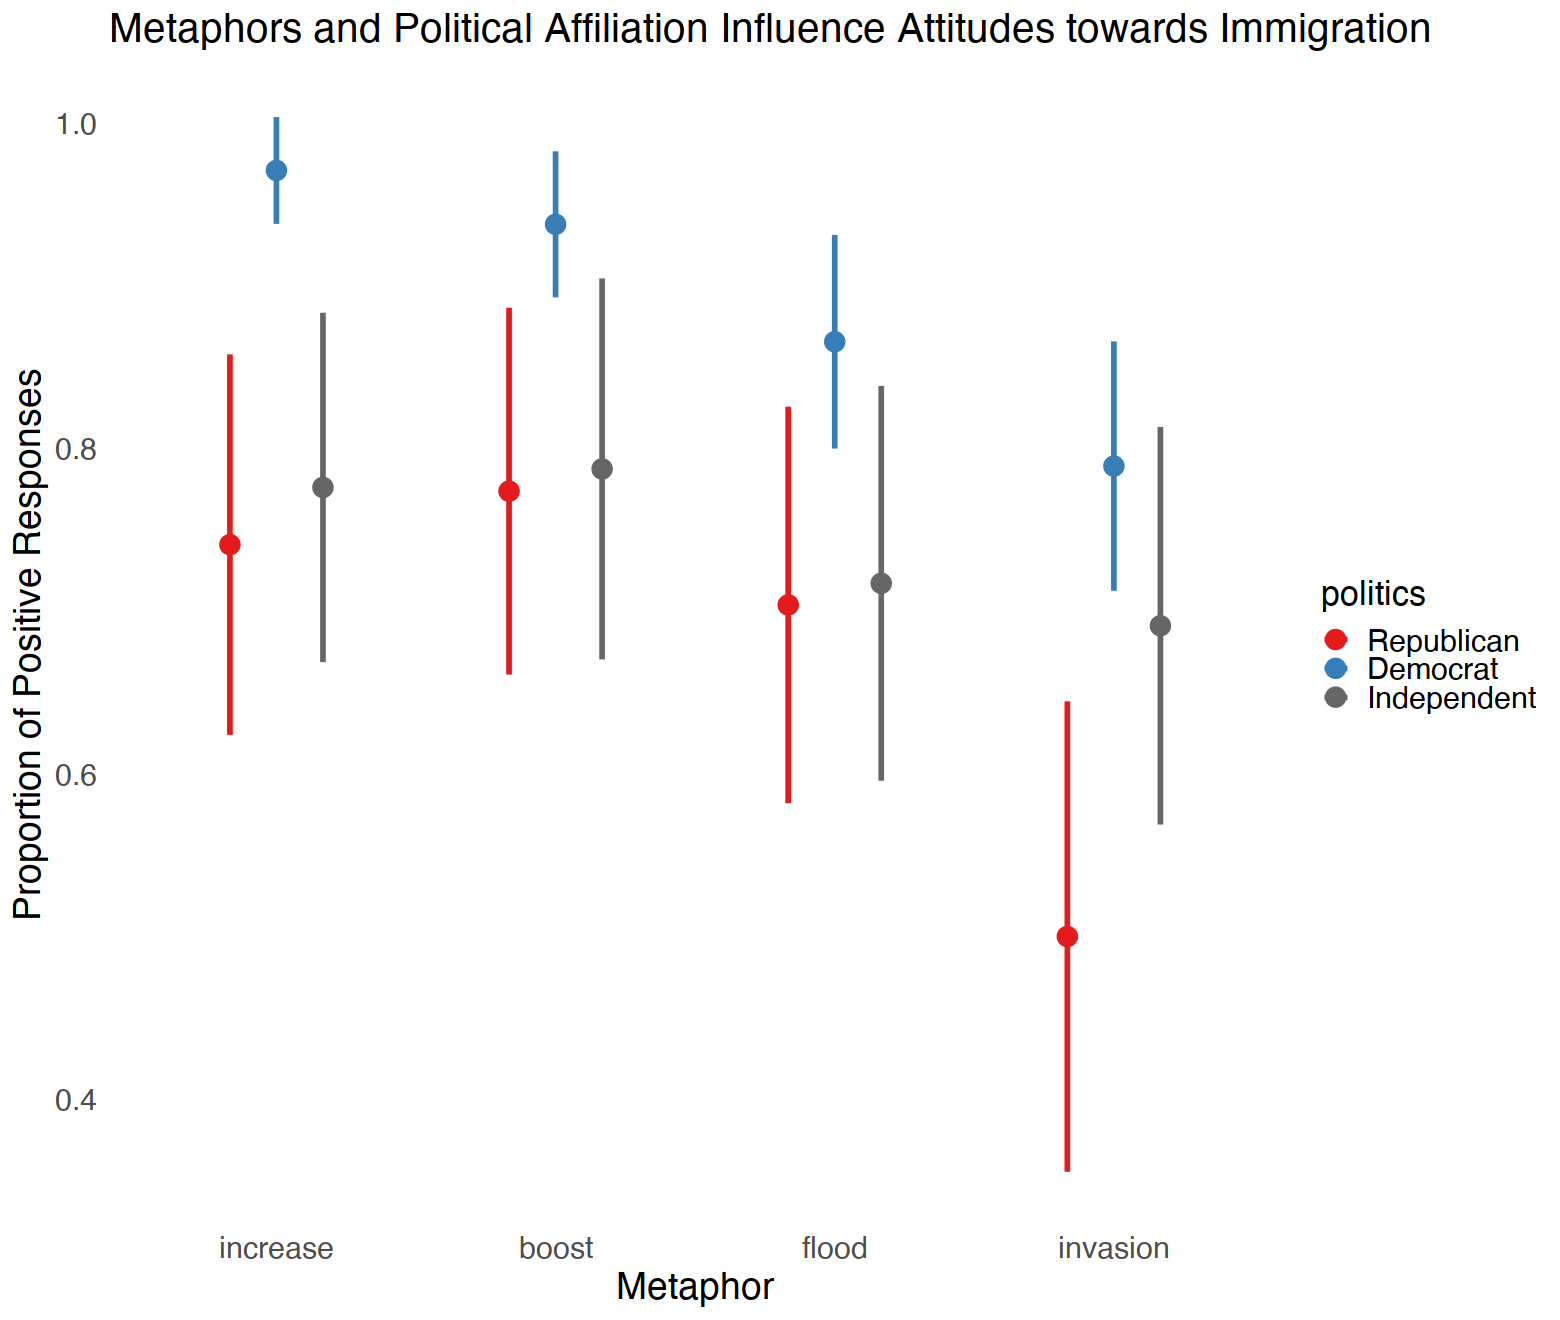

In [31]:
options(repr.plot.width = 13, repr.plot.height = 11)

ggplot(valence_summary, aes(x = condition, y = proportion_positive, color = politics, group = politics)) +
  geom_point(position = position_dodge(width = 0.5), size = 5) +  # Bigger dots
  geom_errorbar(aes(ymin = ci_low, ymax = ci_high),
                position = position_dodge(width = 0.5),
                linewidth = 1.2,  # Thicker error bars
                width = 0  # Removes caps
  ) +
  labs(
    title = "Metaphors and Political Affiliation Influence Attitudes towards Immigration",
    x = "Metaphor",
    y = "Proportion of Positive Responses"
  ) +
  scale_color_manual(
    values = c(
      "Democrat" = "#377eb8",
      "Republican" = "#e41a1c",
      "Independent" = "gray40"
    )
  ) +
  theme_minimal(base_size = 16) +
  theme(
    plot.title = element_text(size = 24, face = "bold"),
    axis.title = element_text(size = 22),
    axis.text = element_text(size = 18),
    legend.title = element_text(size = 20),
    legend.text = element_text(size = 18),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank()
  )


In [44]:
likert_summary <- d %>%
  group_by(condition, politics) %>%
  summarise(
    n = sum(!is.na(likert)),
    mean_likert = mean(likert, na.rm = TRUE),
    sd_likert = sd(likert, na.rm = TRUE),
    se = sd_likert / sqrt(n),
    ci_low = mean_likert - 1.96 * se,
    ci_high = mean_likert + 1.96 * se,
    .groups = "drop"
  )

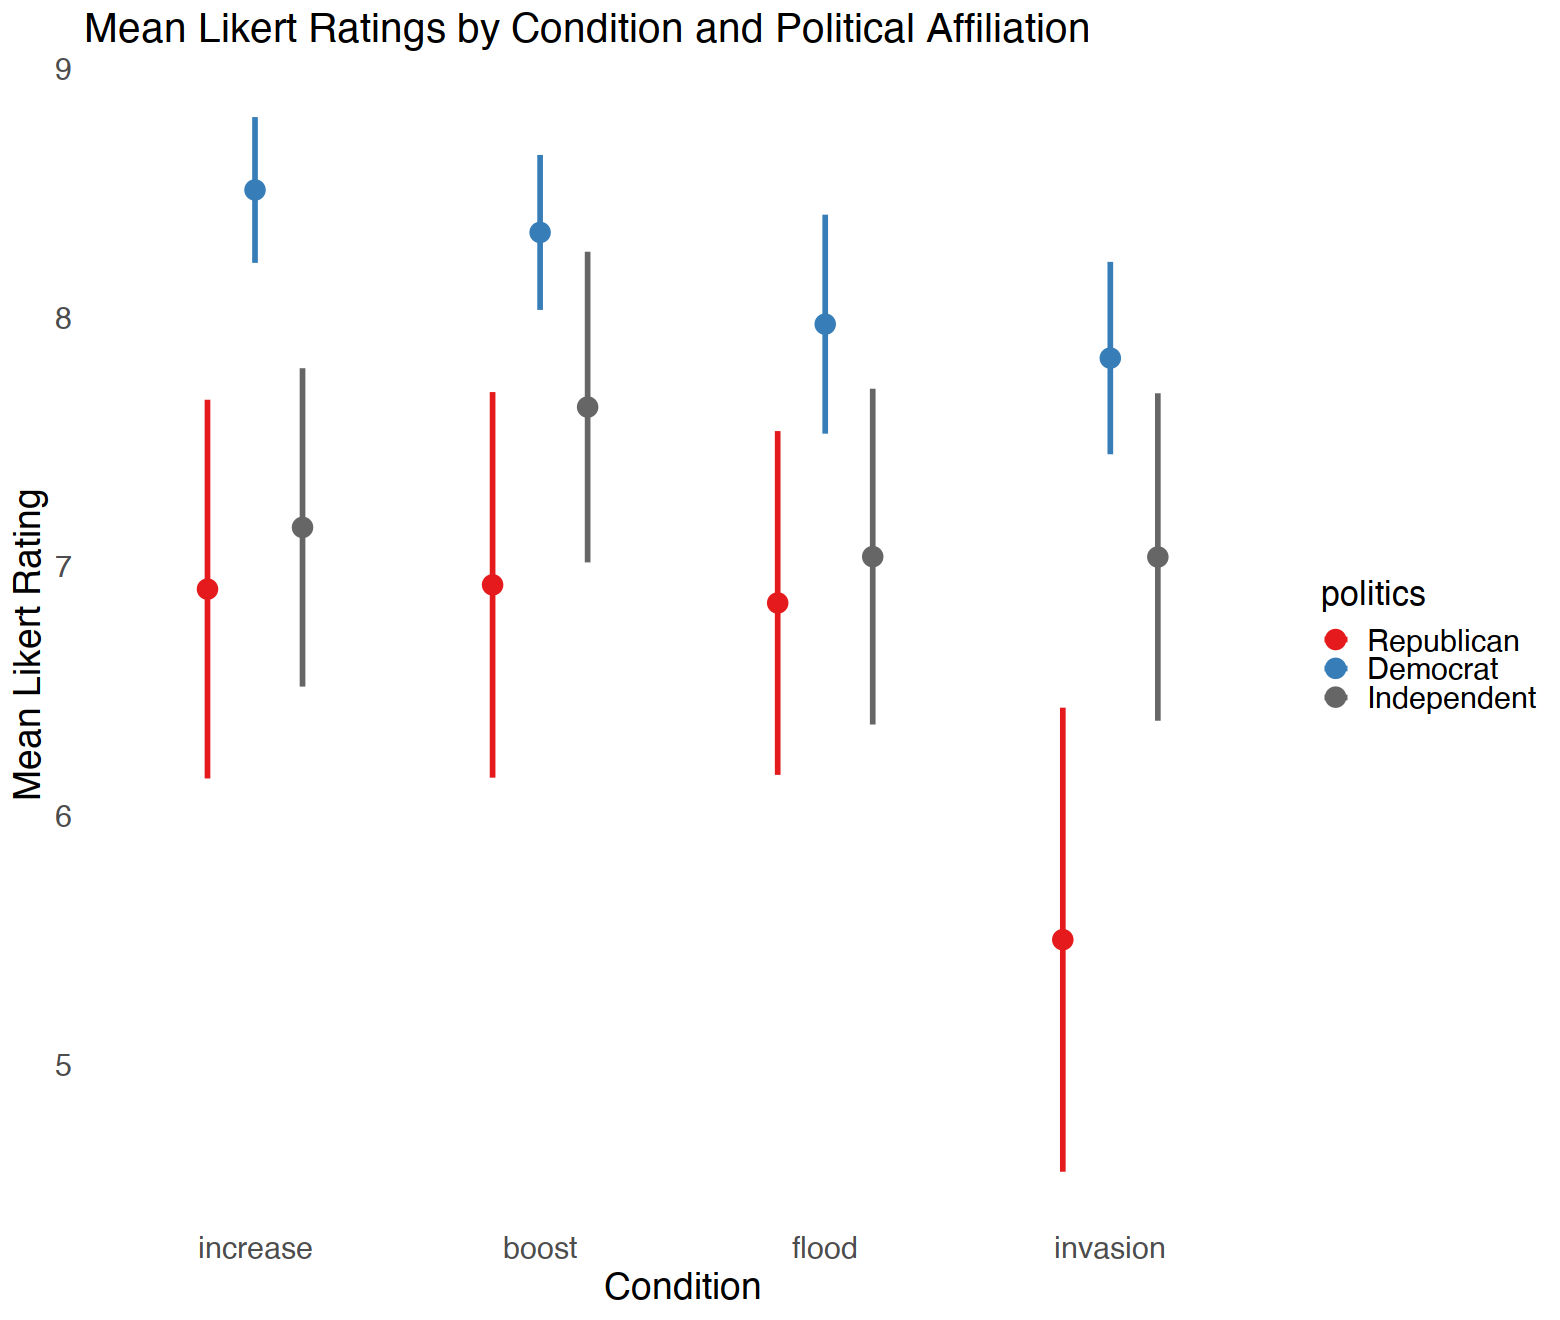

In [45]:
ggplot(likert_summary, aes(x = condition, y = mean_likert, color = politics, group = politics)) +
  geom_point(position = position_dodge(width = 0.5), size = 5) +
  geom_errorbar(aes(ymin = ci_low, ymax = ci_high),
                position = position_dodge(width = 0.5),
                linewidth = 1.2,
                width = 0) +
  labs(
    title = "Mean Likert Ratings by Condition and Political Affiliation",
    x = "Condition",
    y = "Mean Likert Rating"
  ) +
  scale_color_manual(
    values = c(
      "Democrat" = "#377eb8",
      "Republican" = "#e41a1c",
      "Independent" = "gray40"
    )
  ) +
  theme_minimal(base_size = 16) +
  theme(
    plot.title = element_text(size = 24, face = "bold"),
    axis.title = element_text(size = 22),
    axis.text = element_text(size = 18),
    legend.title = element_text(size = 20),
    legend.text = element_text(size = 18),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank()
  )


In [34]:
valence_summary <- d_priming %>%
  group_by(condition, politics) %>%
  summarise(
    n = sum(!is.na(valence)),
    n_positive = sum(valence == "positive", na.rm = TRUE),
    proportion_positive = n_positive / n,
    .groups = "drop"
  )

valence_summary <- valence_summary %>%
  mutate(
    se = sqrt(proportion_positive * (1 - proportion_positive) / n),
    ci_low = proportion_positive - 1.96 * se,
    ci_high = proportion_positive + 1.96 * se
  )

valence_summary <- na.omit(valence_summary)

valence_summary

condition,politics,n,n_positive,proportion_positive,se,ci_low,ci_high
<fct>,<fct>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
increase,Republican,23,17,0.7391304,0.09156054,0.5596718,0.9185891
increase,Democrat,59,55,0.9322034,0.03272904,0.8680545,0.9963523
increase,Independent,36,32,0.8888889,0.05237828,0.7862275,0.9915503
boost,Republican,18,14,0.7777778,0.09799079,0.5857158,0.9698397
boost,Democrat,64,59,0.9218750,0.03354602,0.8561248,0.9876252
boost,Independent,28,22,0.7857143,0.07754431,0.6337274,0.9377011
flood,Republican,24,19,0.7916667,0.08289817,0.6291863,0.9541471
flood,Democrat,65,56,0.8615385,0.04283958,0.7775729,0.9455040
flood,Independent,23,21,0.9130435,0.05875338,0.7978868,1.0282001


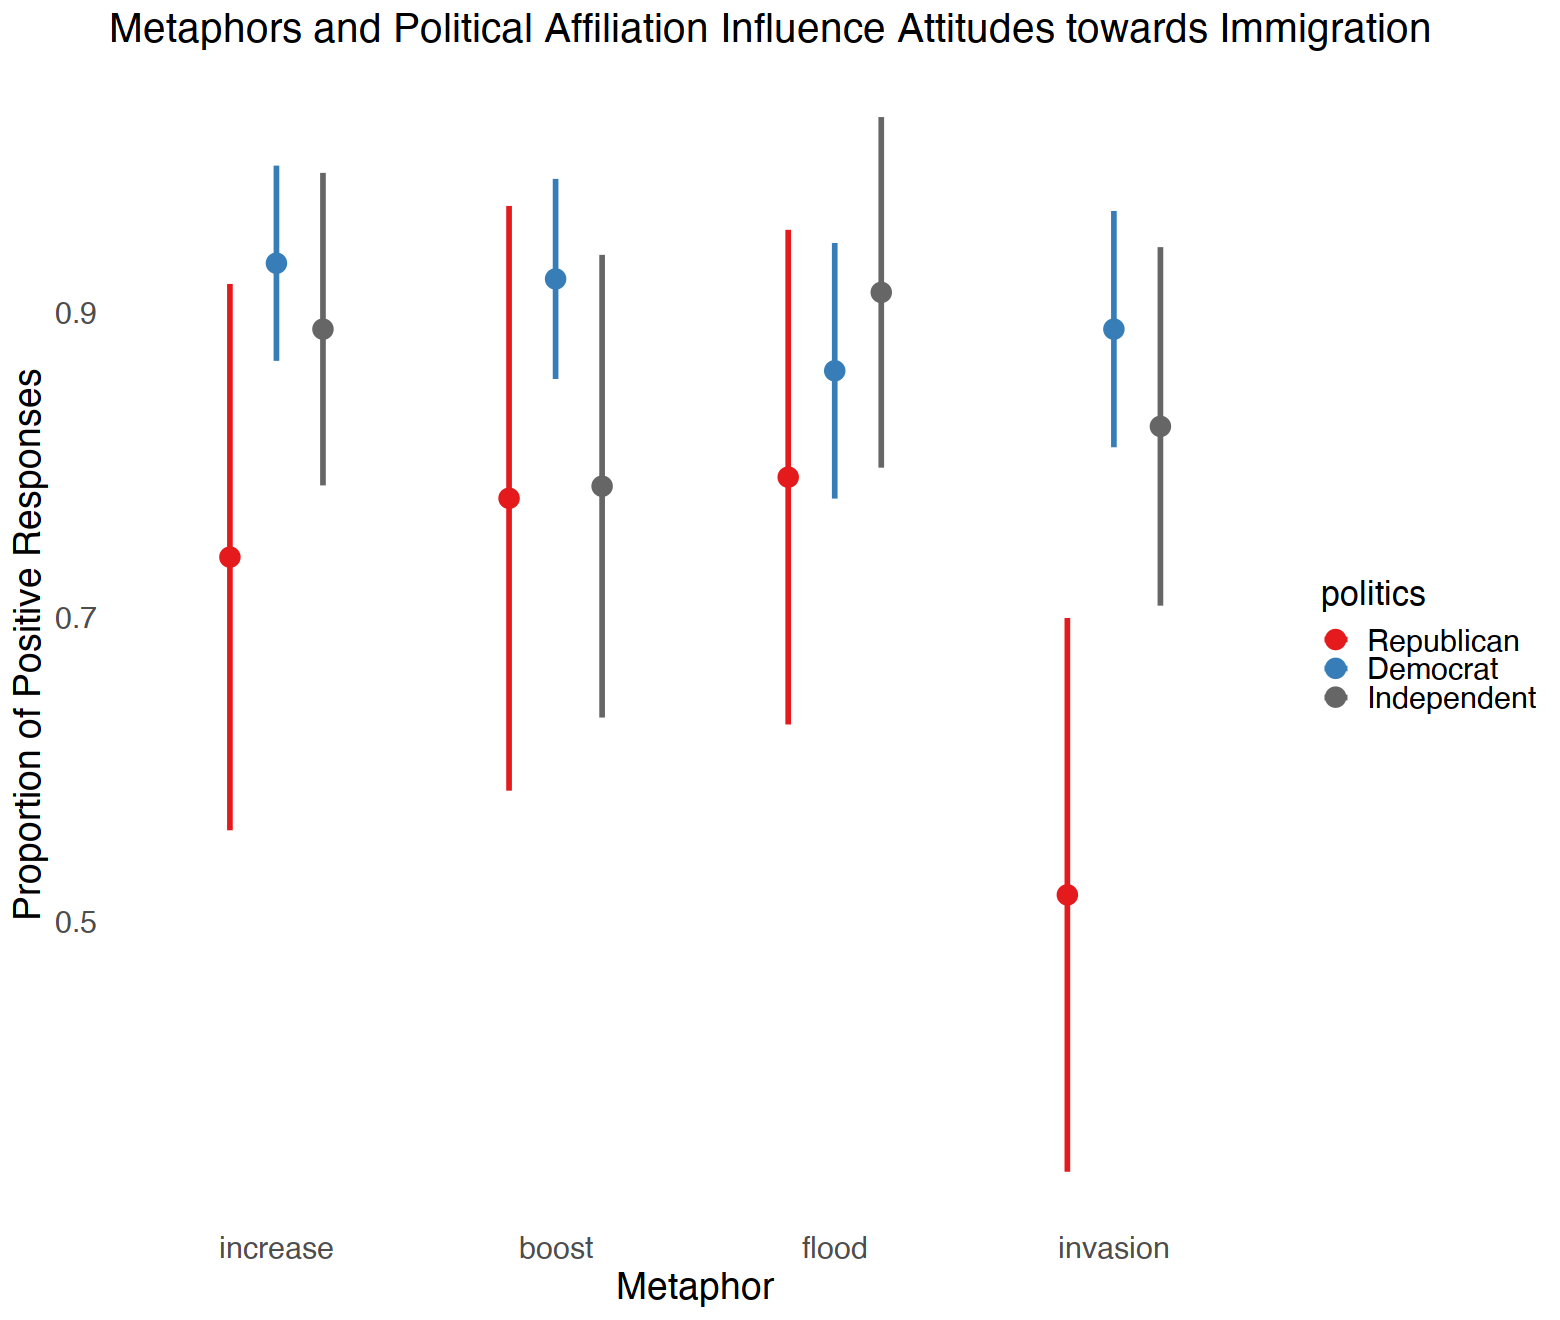

In [35]:
options(repr.plot.width = 13, repr.plot.height = 11)

ggplot(valence_summary, aes(x = condition, y = proportion_positive, color = politics, group = politics)) +
  geom_point(position = position_dodge(width = 0.5), size = 5) +  # Bigger dots
  geom_errorbar(aes(ymin = ci_low, ymax = ci_high),
                position = position_dodge(width = 0.5),
                linewidth = 1.2,  # Thicker error bars
                width = 0  # Removes caps
  ) +
  labs(
    title = "Metaphors and Political Affiliation Influence Attitudes towards Immigration",
    x = "Metaphor",
    y = "Proportion of Positive Responses"
  ) +
  scale_color_manual(
    values = c(
      "Democrat" = "#377eb8",
      "Republican" = "#e41a1c",
      "Independent" = "gray40"
    )
  ) +
  theme_minimal(base_size = 16) +
  theme(
    plot.title = element_text(size = 24, face = "bold"),
    axis.title = element_text(size = 22),
    axis.text = element_text(size = 18),
    legend.title = element_text(size = 20),
    legend.text = element_text(size = 18),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank()
  )


In [38]:
likert_summary <- d_priming %>%
  group_by(condition, politics) %>%
  summarise(
    n = sum(!is.na(likert)),
    mean_likert = mean(likert, na.rm = TRUE),
    sd_likert = sd(likert, na.rm = TRUE),
    se = sd_likert / sqrt(n),
    ci_low = mean_likert - 1.96 * se,
    ci_high = mean_likert + 1.96 * se,
    .groups = "drop"
  )

likert_summary <- na.omit(likert_summary)


likert_summary

condition,politics,n,mean_likert,sd_likert,se,ci_low,ci_high
<fct>,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
increase,Republican,23,6.521739,3.058068,0.6376512,5.271943,7.771536
increase,Democrat,59,8.474576,1.794205,0.2335855,8.016749,8.932404
increase,Independent,36,7.833333,2.311462,0.3852437,7.078256,8.588411
boost,Republican,18,6.777778,2.510110,0.5916387,5.618166,7.937390
boost,Democrat,64,8.281250,1.558069,0.1947586,7.899523,8.662977
boost,Independent,28,7.321429,2.373520,0.4485531,6.442264,8.200593
flood,Republican,24,6.791667,2.536330,0.5177262,5.776923,7.806410
flood,Democrat,65,7.769231,2.156163,0.2674391,7.245050,8.293411
flood,Independent,23,8.043478,2.077548,0.4331987,7.194409,8.892548


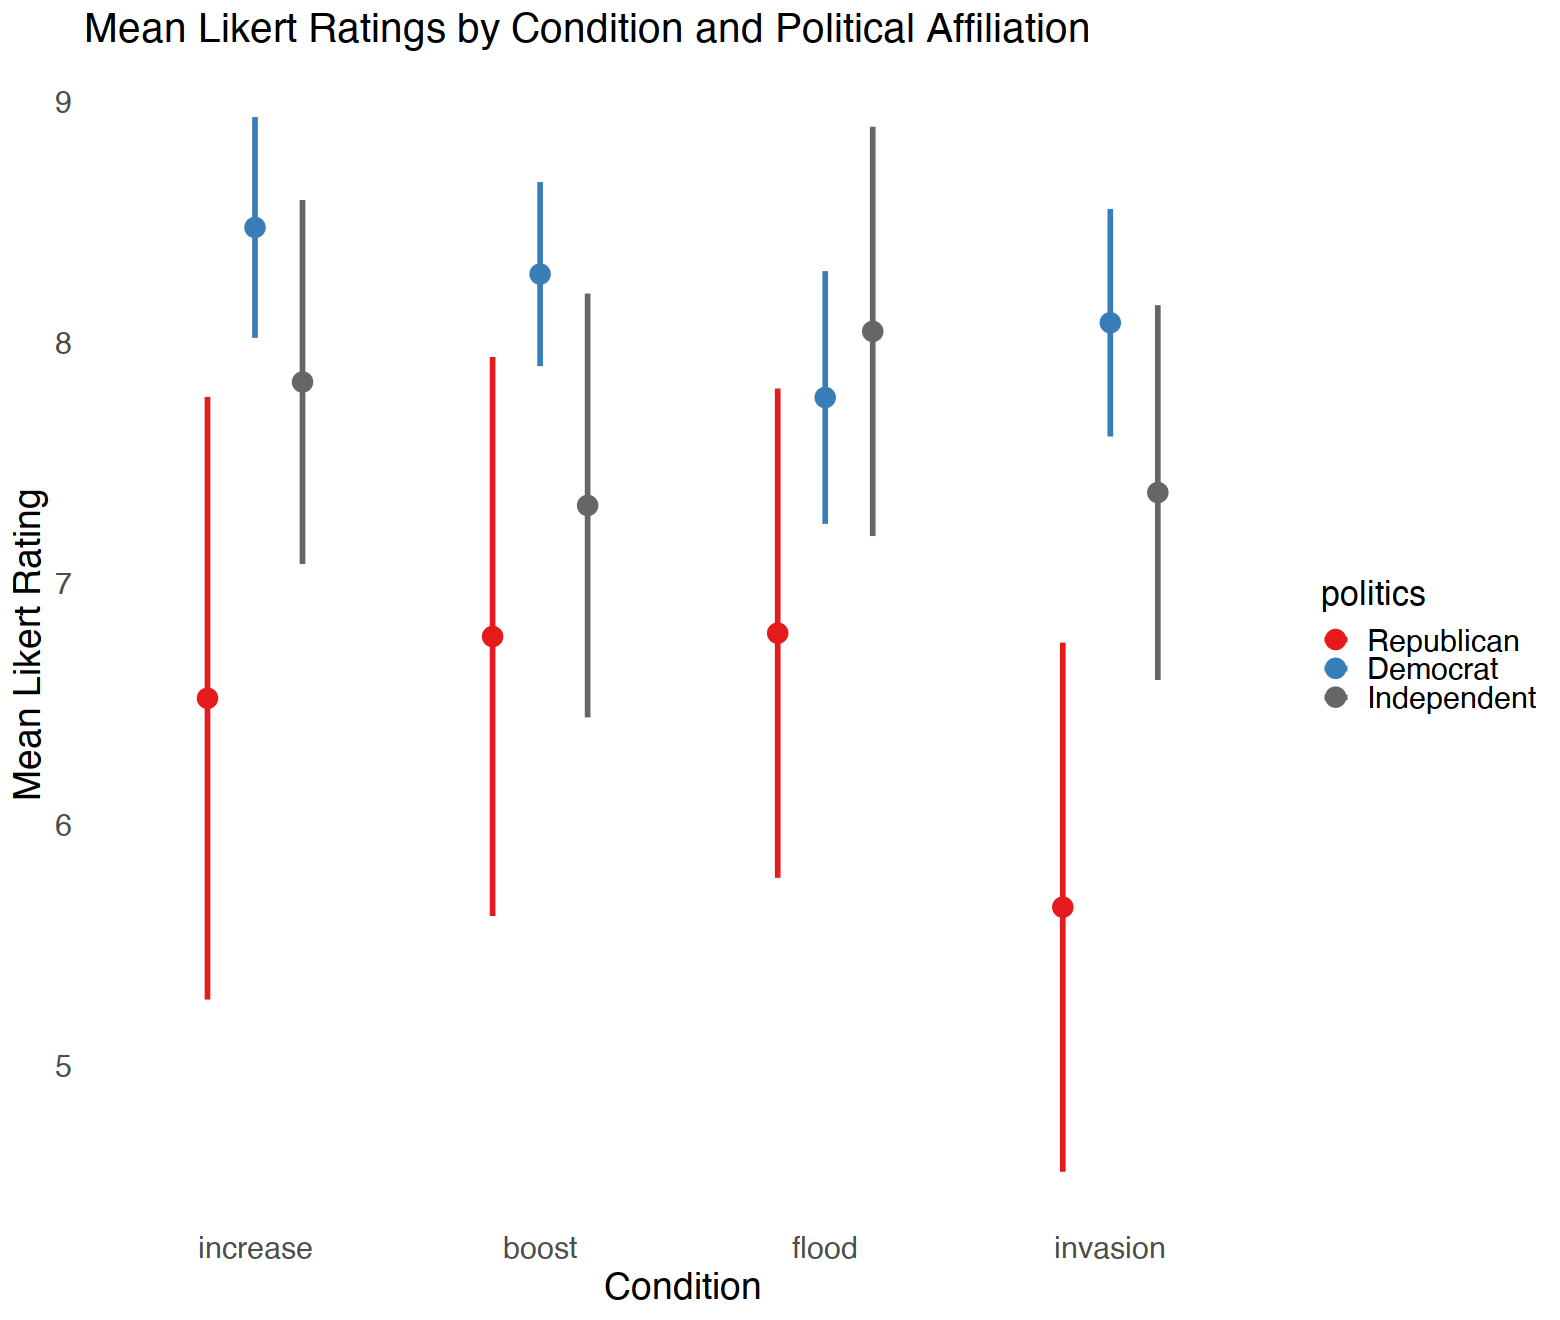

In [39]:
ggplot(likert_summary, aes(x = condition, y = mean_likert, color = politics, group = politics)) +
  geom_point(position = position_dodge(width = 0.5), size = 5) +
  geom_errorbar(aes(ymin = ci_low, ymax = ci_high),
                position = position_dodge(width = 0.5),
                linewidth = 1.2,
                width = 0) +
  labs(
    title = "Mean Likert Ratings by Condition and Political Affiliation",
    x = "Condition",
    y = "Mean Likert Rating"
  ) +
  scale_color_manual(
    values = c(
      "Democrat" = "#377eb8",
      "Republican" = "#e41a1c",
      "Independent" = "gray40"
    )
  ) +
  theme_minimal(base_size = 16) +
  theme(
    plot.title = element_text(size = 24, face = "bold"),
    axis.title = element_text(size = 22),
    axis.text = element_text(size = 18),
    legend.title = element_text(size = 20),
    legend.text = element_text(size = 18),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank()
  )


In [84]:
nrc <- get_sentiments("nrc")  # Includes both emotions and positive/negative labels

Do you want to download:
 Name: NRC Word-Emotion Association Lexicon 
 URL: http://saifmohammad.com/WebPages/lexicons.html 
 License: License required for commercial use. Please contact Saif M. Mohammad (saif.mohammad@nrc-cnrc.gc.ca). 
 Size: 22.8 MB (cleaned 424 KB) 
 Download mechanism: http 
 Citation info:

This dataset was published in Saif M. Mohammad and Peter Turney. (2013), ``Crowdsourcing a Word-Emotion Association Lexicon.'' Computational Intelligence, 29(3): 436-465.

article{mohammad13,
author = {Mohammad, Saif M. and Turney, Peter D.},
title = {Crowdsourcing a Word-Emotion Association Lexicon},
journal = {Computational Intelligence},
volume = {29},
number = {3},
pages = {436-465},
doi = {10.1111/j.1467-8640.2012.00460.x},
url = {https://onlinelibrary.wiley.com/doi/abs/10.1111/j.1467-8640.2012.00460.x},
eprint = {https://onlinelibrary.wiley.com/doi/pdf/10.1111/j.1467-8640.2012.00460.x},
year = {2013}
}
If you use this lexicon, then please cite it. 


ERROR: Error in menu(choices = c("Yes", "No"), title = title): menu() cannot be used non-interactively
